In [74]:
%matplotlib inline

import pandas as pd
import seaborn as sns

sns.set_style('white')

In [51]:
from pathlib import Path

def read_fusions(file_path):
    """Reads fusions from STAR-Fusion final candidate file."""
    
    col_names = ['fusion_name', 'support_junction', 
                 'support_spanning', 'splice_type',
                 'left_gene', 'left_breakpoint', 'right_gene', 
                 'right_breakpoint', 'junction_reads',
                 'spanning_reads', 'extra']
    
    return (pd.read_csv(str(file_path), sep='\t', header=None,
                        skiprows=1, index_col=None, names=col_names)
              .drop('extra', axis=1))

# Read fusions for samples.
base_dir = Path('../data/interim/sanger/star-fusion/fusions')
sample_dirs = [x for x in base_dir.iterdir() if x.is_dir()]

fusions = {sample_dir.name: 
           read_fusions(sample_dir / 'star-fusion.fusion_candidates.final')
           for sample_dir in sample_dirs}

# Merge into single frame.
merged = pd.concat((df.assign(sample=sample) 
                    for sample, df in fusions.items()),
                   axis=0, ignore_index=True)

merged.head()

,fusion_name,support_junction,support_spanning,splice_type,left_gene,left_breakpoint,right_gene,right_breakpoint,junction_reads,spanning_reads,sample
0,Cblb--En2,224,0,ONLY_REF_SPLICE,Cblb^ENSMUSG00000022637,16:52142898:+,En2^ENSMUSG00000039095,5:28170119:+,"ERR578387.18555652,ERR578345.14650580,ERR57838...",.,TAPJ84_3c
1,Nktr--Gm525,114,0,INCL_NON_REF_SPLICE,Nktr^ENSMUSG00000032525,9:121729196:+,Gm525^ENSMUSG00000072553,11:89088699:+,"ERR578373.2356452,ERR578359.17343254,ERR578373...",.,TAPJ84_3c
2,Pot1a--En2,56,0,ONLY_REF_SPLICE,Pot1a^ENSMUSG00000029676,6:25758818:-,En2^ENSMUSG00000039095,5:28170119:+,"ERR578331.12746934,ERR578359.16365770,ERR57834...",.,TAPJ84_3c
3,Cox7a2l--Man2c1os,31,0,INCL_NON_REF_SPLICE,Cox7a2l^ENSMUSG00000024248,17:83502260:-,Man2c1os^ENSMUSG00000086728,9:57100303:-,"ERR578331.4921262,ERR578345.5856532,ERR578373....",.,TAPJ84_3c
4,Mthfsd--1700020I14Rik,20,0,INCL_NON_REF_SPLICE,Mthfsd^ENSMUSG00000031816,8:121097826:-,1700020I14Rik^ENSMUSG00000085438,2:119605895:+,"ERR578373.7185051,ERR578359.7207290,ERR578345....",.,TAPJ84_3c


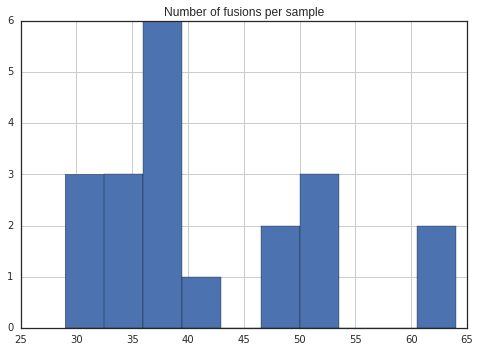

In [76]:
ax = merged.groupby('sample').size().hist()
ax.set_title('Number of fusions per sample');

In [55]:
(merged.groupby('fusion_name')
       ['sample'].nunique()
       .sort_values(ascending=False)).head(n=20)

fusion_name
Haus8--Gstz1             19
Etv6--Runx1              16
Zbtb20--Ablim1           15
Zfp106--Ifnar1           14
Rrm2--Rragd              14
Mthfsd--1700020I14Rik    14
Cox7a2l--Man2c1os        14
Dnajc3--Tns1             13
Rbm3--Figf               12
mt-Ti--mt-Nd1            11
Inpp1--Hif1an            10
Gm11020--Sirpa           10
Tlx1--Ubald2             10
Nktr--Gm525              10
Car2--Uxs1                9
Hexdc--Khdrbs1            9
A430104N18Rik--Mcm7       8
Pkig--Amfr                8
Tubb5--Tmtc2              8
Ube2e2--Ubald2            7
Name: sample, dtype: int64

In [61]:
merged_ref = merged.query('splice_type == "ONLY_REF_SPLICE"')

(merged_ref.groupby('fusion_name')
           ['sample'].nunique()
           .sort_values(ascending=False)).head(n=20)

fusion_name
Etv6--Runx1                     16
Hexdc--Khdrbs1                   9
A430104N18Rik--Mcm7              8
Dnmt1--Dyx1c1                    5
Mcm9--Asf1a                      5
RP23-32C18.5--Ms4a4d             4
Ighv12-3--Ighm                   4
Hbb-bs--Hba-a1                   3
Rabgap1l--En2                    3
Nfe2l2--Hnrnpa3                  3
Ighv2-9--Ighg1                   3
Ralyl--Ralyl                     3
Hba-a1--Hbb-bt                   3
Diap3--Tdrd3                     3
A430104N18Rik--2010111I01Rik     3
Tlr7--Prps2                      2
Ptprc--En2                       2
Ighv2-2--Ighg3                   2
Snca--Bpgm                       2
Fubp1--Ivns1abp                  2
Name: sample, dtype: int64

In [65]:
mask = merged_ref['fusion_name'].str.contains('En2')
merged_ref.loc[mask, 'fusion_name'].value_counts()

Ptprc--En2       4
Rabgap1l--En2    3
Suco--En2        1
Cblb--En2        1
Pot1a--En2       1
Pax5--En2        1
Fam120c--En2     1
Fam105a--En2     1
Uck2--En2        1
Nras--En2        1
Name: fusion_name, dtype: int64